In [106]:
#For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

# * lat : String variable, Latitude
# * lng: String variable, Longitude
# * desc: String variable, Description of the Emergency Call
# * zip: String variable, Zipcode
# * title: String variable, Title
# * timeStamp: String variable, YYYY-MM-DD HH:MM:SS
# * twp: String variable, Township
# * addr: String variable, Address
# * e: String variable, Dummy variable (always 1)

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df= pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [10]:
#Top 5 zip codes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [11]:
# Top 5 townships for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [12]:
# no. of unique titles 

df['title'].nunique() #or len(df['title'].unique())

110

In [13]:
# Creating a new column of reasons

df['Reason']=df['title'].apply(lambda title:title.split(':')[0] )

In [14]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

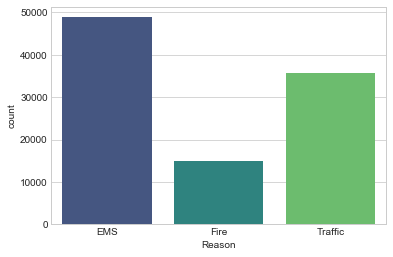

In [55]:
# Creating a countplot for visualization

sns.countplot(x='Reason',data=df,palette='viridis')

In [19]:
type(df['timeStamp'].iloc[0])

str

In [21]:
#converting timestamp into date time objects
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [22]:
df['Hour']=df['timeStamp'].apply(lambda time : time.hour)
df['Month']=df['timeStamp'].apply(lambda time : time.month )
df['Day Of Week'] = df['timeStamp'].apply(lambda time : time.dayofweek)

In [25]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'fri',5:'sat',6:'sun'}

In [26]:
# mapping Day of Week with the dmap as Day of Week is an integer value between 0-6

df['Day Of Week'] = df['Day Of Week'].map(dmap)

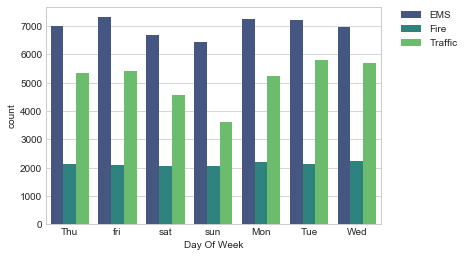

In [54]:
#countplot of the 'Day of Week' column with the hue based off of the 'Reason' column using seaborn
    
sns.countplot( x='Day Of Week',data=df, hue= 'Reason',palette='viridis')
    
#For relocating the legend

plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

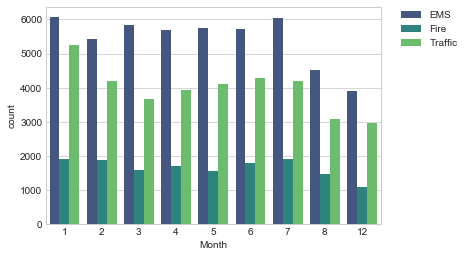

In [44]:
#Same for the months

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)

In [47]:
# It is missing some months! 9,10, and 11 are not there.


byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


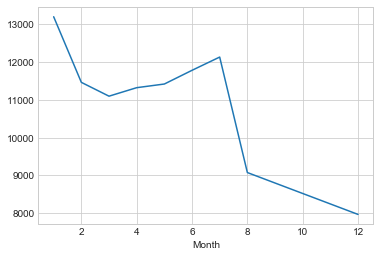

In [50]:
# A major dip can be seen

byMonth['lat'].plot()

In [56]:
# No. of calls on the basis of date 
# There is no such column of date so we have to recreate the data Frame


df['Date']=df['timeStamp'].apply( lambda t:t.date() )

In [60]:
t =df.groupby('Date').count()['lat']
t
#df.groupby('Date').count()['lat'].plot()
#plt.tight_layout

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
2015-12-15    421
2015-12-16    377
2015-12-17    388
2015-12-18    346
2015-12-19    279
2015-12-20    271
2015-12-21    430
2015-12-22    448
2015-12-23    524
2015-12-24    445
2015-12-25    323
2015-12-26    296
2015-12-27    317
2015-12-28    380
2015-12-29    365
2015-12-30    361
2015-12-31    318
2016-01-01    263
2016-01-02    335
2016-01-03    324
2016-01-04    402
2016-01-05    448
2016-01-06    434
2016-01-07    385
2016-01-08    359
             ... 
2016-07-26    446
2016-07-27    421
2016-07-28    443
2016-07-29    431
2016-07-30    353
2016-07-31    381
2016-08-01    384
2016-08-02    404
2016-08-03    403
2016-08-04    422
2016-08-05    422
2016-08-06    378
2016-08-07    332
2016-08-08    378
2016-08-09    350
2016-08-10    345
2016-08-11    449
2016-08-12    441
2016-08-13    393
2016-08-14    332
2016-08-15    360
2016-08-16    419
2016-08-17    415
2016-08-18    359
2016-

<function matplotlib.pyplot.tight_layout>

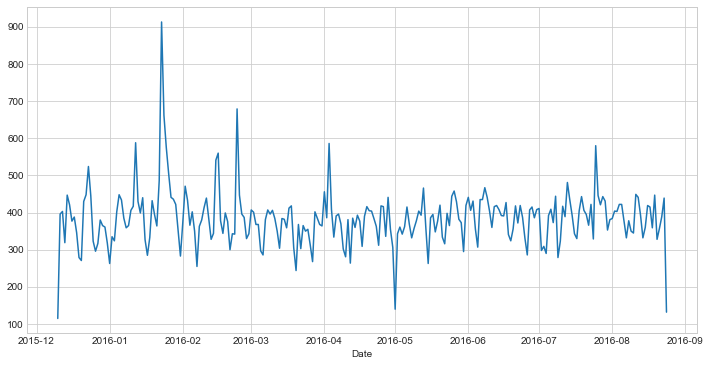

In [67]:
plt.figure(figsize=(12,6))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout

Text(0.5,1,'Traffic')

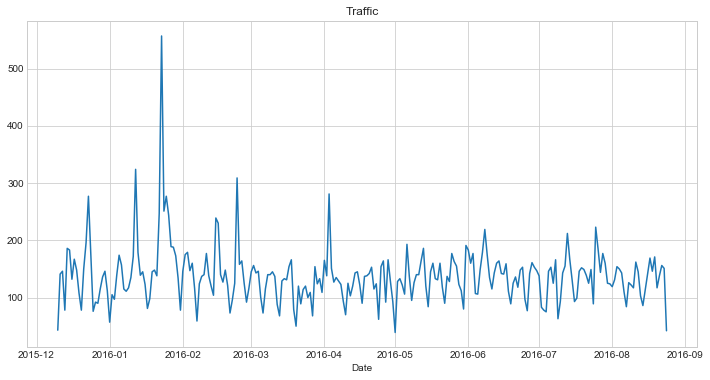

In [73]:
# Recreating this plot by making 3 seprate plots each for every reason
plt.figure(figsize=(12,6))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5,1,'Fire')

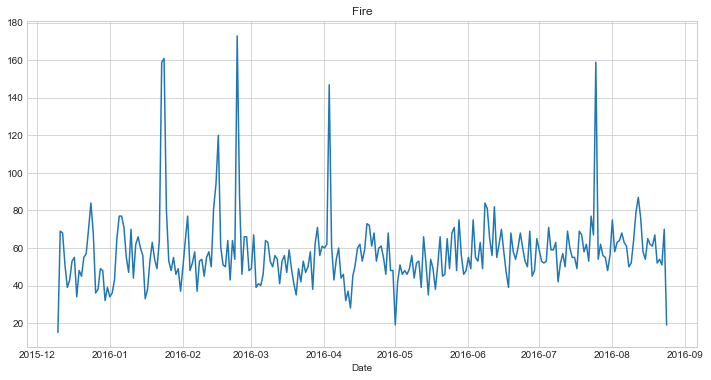

In [74]:
plt.figure(figsize=(12,6))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')

Text(0.5,1,'EMS')

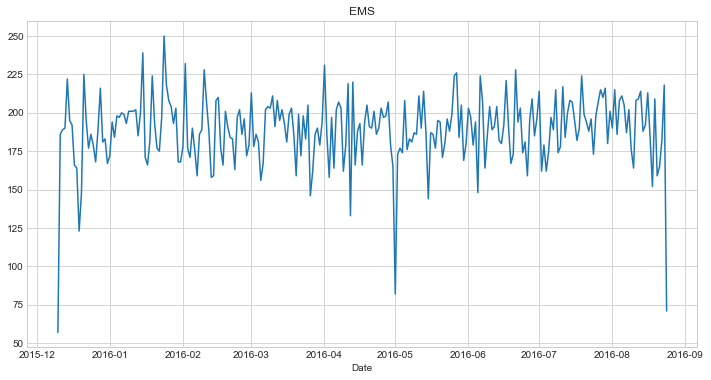

In [76]:
plt.figure(figsize=(12,6))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

In [78]:
# Heat Maps
#We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

dayHour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


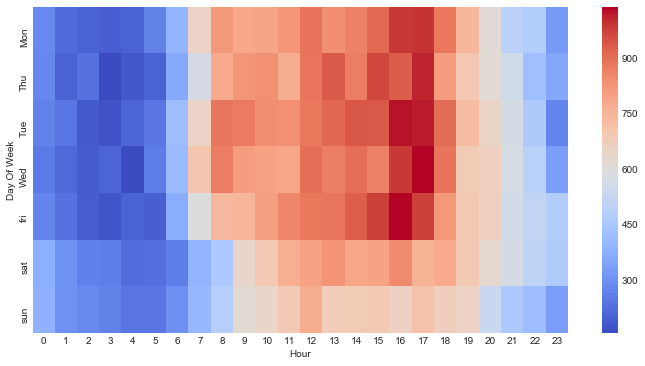

In [82]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

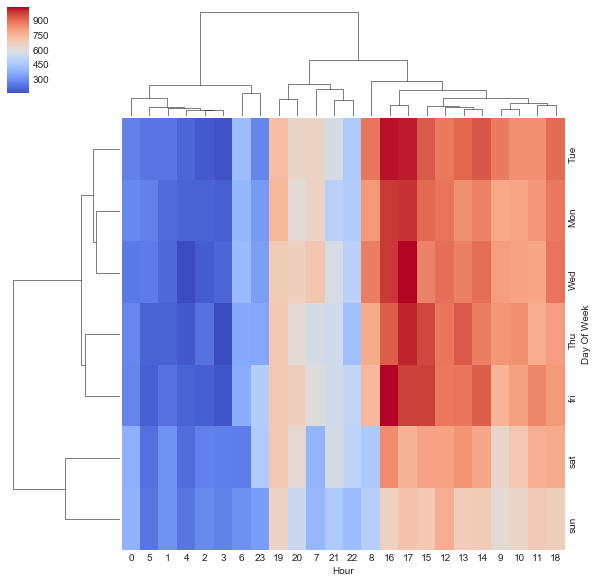

In [83]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='coolwarm')

In [96]:
#repeating these same plots and operations, for a DataFrame that shows the Month as the column. 

dayofmonth=df.groupby(by=['Day Of Week','Month']).count()

In [97]:
dayofmonth

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day Of Week Month                                                               
Mon         1      1727  1727  1727  1506   1727       1727  1727  1717  1727   
            2      1964  1964  1964  1658   1964       1964  1964  1958  1964   
            3      1535  1535  1535  1364   1535       1535  1533  1530  1535   
            4      1598  1598  1598  1401   1598       1598  1597  1594  1598   
            5      1779  1779  1779  1547   1779       1779  1779  1775  1779   
            6      1617  1617  1617  1397   1617       1617  1617  1611  1617   
            7      1692  1692  1692  1473   1692       1692  1692  1689  1692   
            8      1511  1511  1511  1316   1511       1511  1509  1500  1511   
            12     1257  1257  1257  1101   1257       1257  1256  1253  1257   
Thu         1      1584  1584  1584  1387   1584       1584  1584  1578  1584   
            2      1596  1596  1596  1392   1596       1596  1596  1583  1596   
            3      1900  1900  1900  1648   1900       1900  1900  1889  1900   
            4      1601  1601  1601  1391   1601       1601  1601  1591  1601   
            5      1590  1590  1590  1387   1590       1590  1590  1586  1590   
            6      2065  2065  2065  1800   2065       2065  2065  2055  2065   
            7      1646  1646  1646  1447   1646       1646  1646  1643  1646   
            8      1230  1230  1230  1038   1230       1230  1227  1225  1230   
            12     1266  1266  1266  1090   1266       1266  1265  1258  1266   
Tue         1      1973  1973  1973  1699   1973       1973  1973  1960  1973   
            2      1753  1753  1753  1535   1753       1753  1753  1745  1753   
            3      1884  1884  1884  1647   1884       1884  1884  1874  1884   
            4      1430  1430  1430  1255   1430       1430  1430  1422  1430   
            5      1918  1918  1918  1660   1918       1918  1917  1904  1918   
            6      1676  1676  1676  1453   1676       1676  1673  1668  1676   
            7      1670  1670  1670  1451   1670       1670  1668  1648  1670   
            8      1612  1612  1612  1415   1612       1612  1612  1604  1612   
            12     1234  1234  1234  1092   1234       1234  1233  1232  1234   
Wed         1      1700  1700  1700  1483   1700       1700  1699  1687  1700   
            2      1903  1903  1903  1684   1903       1903  1902  1886  1903   
            3      1889  1889  1889  1680   1889       1889  1888  1885  1889   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
            7      1717  1717  1717  1504   1717       1717  1715  1711  1717   
            8      1295  1295  1295  1106   1295       1295  1295  1287  1295   
            12     1262  1262  1262  1081   1262       1262  1260  1249  1262   
fri         1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   
            6      1649  1649  1649  1429   1649       1649  1649  1644  1649   
            7      2045  2045  2045  1811   2045       2045  2045  2040  2045   
            8      1310  1310  1310  1123   1310       1310  1310  1306  1310   
            12     1065  1065  1065   906   1065       1065  1064  1060  1065   
sat         1      2291  2291  2291  1987   2291       2291  2290  2248  2291   
            2      1441  1441  1441  1240   1441       1441  1440  1435  1441   
            3      1266  1266  1266  1110   1266       1266  1264  1263  1266   
            4      1734  1734  1734  1512   1734       1734  1732  1731  1734   
            5      1444  1444  1444  1265   1444   

In [98]:
dayofmonth=df.groupby(by=['Day Of Week','Month']).count()['Reason'].unstack()

In [99]:
dayofmonth

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
sat,2291,1441,1266,1734,1444,1388,1695,1099,978
sun,1960,1229,1102,1488,1424,1333,1672,1021,907


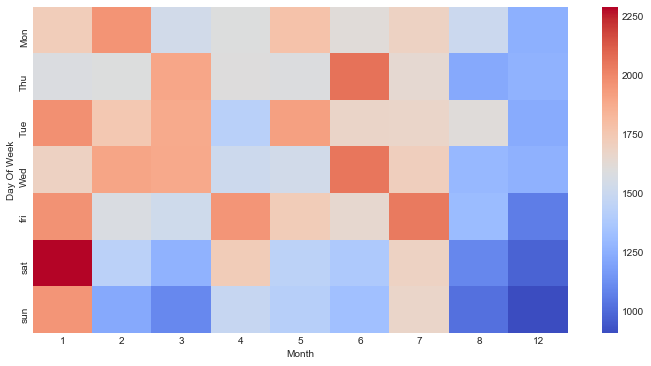

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(dayofmonth,cmap='coolwarm')

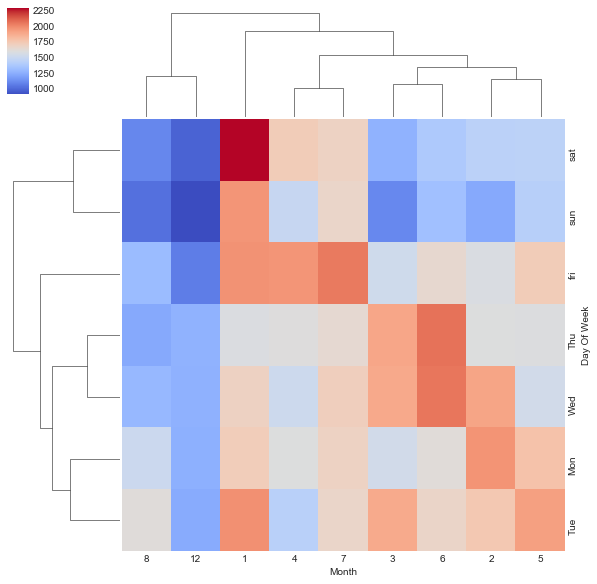

In [101]:
plt.figure(figsize=(12,6))
sns.clustermap(dayofmonth,cmap='coolwarm')

In [112]:
#This Project is made by Armaan Sachdeva,Chandigarh Engineering College.